In [66]:
# sample_submission.csv
!gdown 1g84vrr6nAb2fIw5joj_UwMGYGYNs_h4G

# train.csv
!gdown 15SHv5yc1HHixWrLnzIqkGTFqiOJSb3pY

# test.csv
!gdown 1ecnsSAiLm_SB5c4R1WDb8__4KiR9M8OD

Downloading...
From: https://drive.google.com/uc?id=1g84vrr6nAb2fIw5joj_UwMGYGYNs_h4G
To: /content/sample_submission.csv
100% 59.9k/59.9k [00:00<00:00, 65.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=15SHv5yc1HHixWrLnzIqkGTFqiOJSb3pY
To: /content/train.csv
100% 805k/805k [00:00<00:00, 52.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ecnsSAiLm_SB5c4R1WDb8__4KiR9M8OD
To: /content/test.csv
100% 372k/372k [00:00<00:00, 107MB/s]


In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# **Use Manualy Input **

Melakukan proses imputasi data yang kosong isi dengan 0,mean,modus


In [68]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [69]:
df_train = df_train.drop(['PassengerId','Name'],axis=1)
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


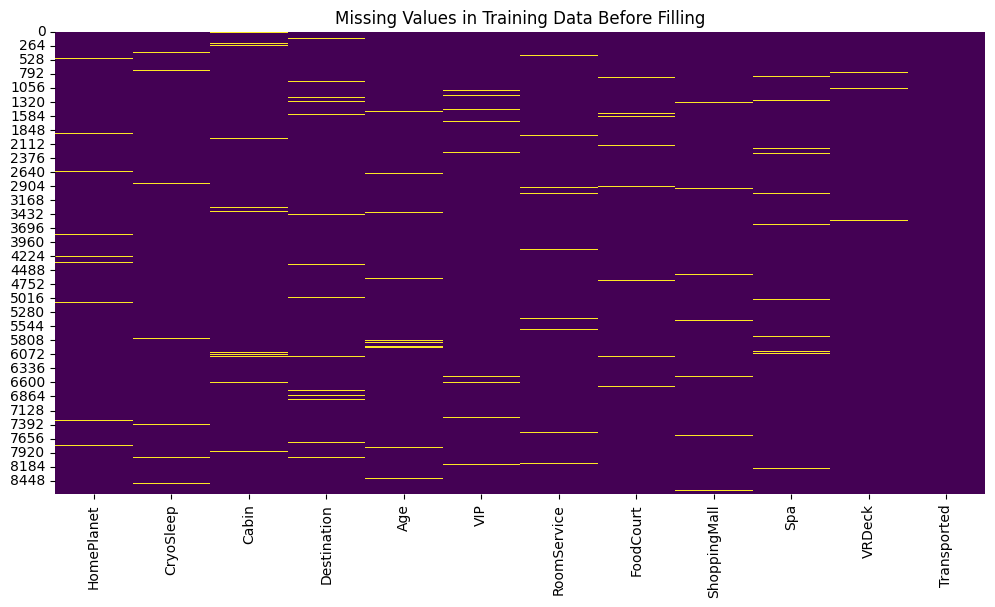

In [70]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data Before Filling')
plt.show()

In [71]:
print("Data Train : \n", df_train.isnull().sum())


Data Train : 
 HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [72]:
df_train['Spa'] = df_train['Spa'].fillna(0)

df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(0)

df_train['FoodCourt'] = df_train['FoodCourt'].fillna(0)


df_train['RoomService'] = df_train['RoomService'].fillna(0)

df_train['VRDeck'] = df_train['VRDeck'].fillna(0)

In [73]:
df_train['Spa'] = df_train['Spa'].fillna(df_train['Spa'].mode()[0])
df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].mode()[0])
df_train['FoodCourt'] = df_train['FoodCourt'].fillna(df_train['FoodCourt'].mode()[0])
df_train['RoomService'] = df_train['RoomService'].fillna(df_train['RoomService'].mode()[0])
df_train['VRDeck'] = df_train['VRDeck'].fillna(df_train['VRDeck'].mode()[0])
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

df_train['HomePlanet'] = df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0])
df_train['Destination'] = df_train['Destination'].fillna(df_train['Destination'].mode()[0])
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0])
df_train['VIP'] = df_train['VIP'].fillna(df_train['VIP'].mode()[0])
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])


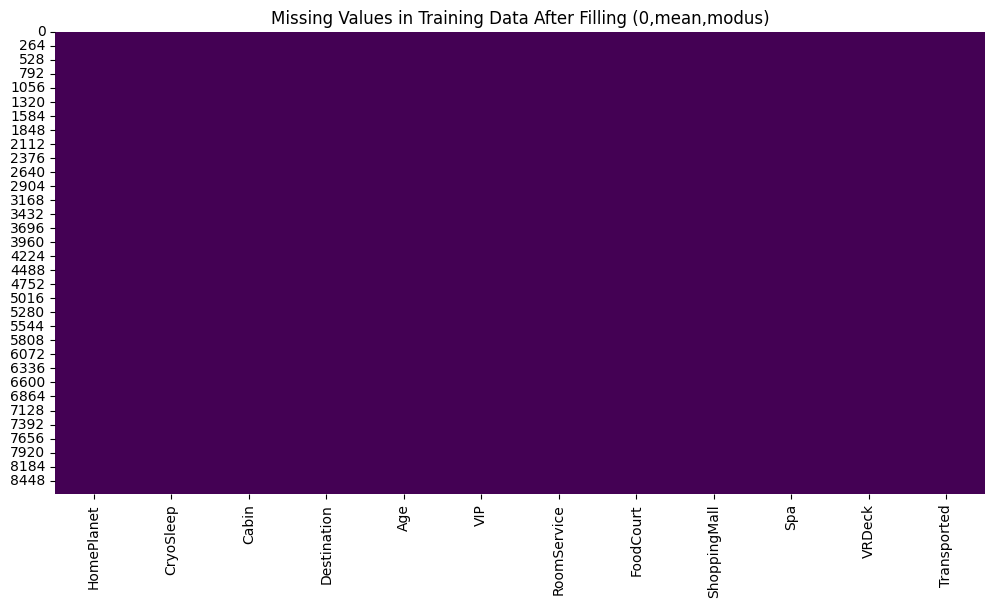

In [74]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data After Filling (0,mean,modus)')
plt.show()

Distribusi data dengan data outlier, yang ditampikan dalam bentok plot

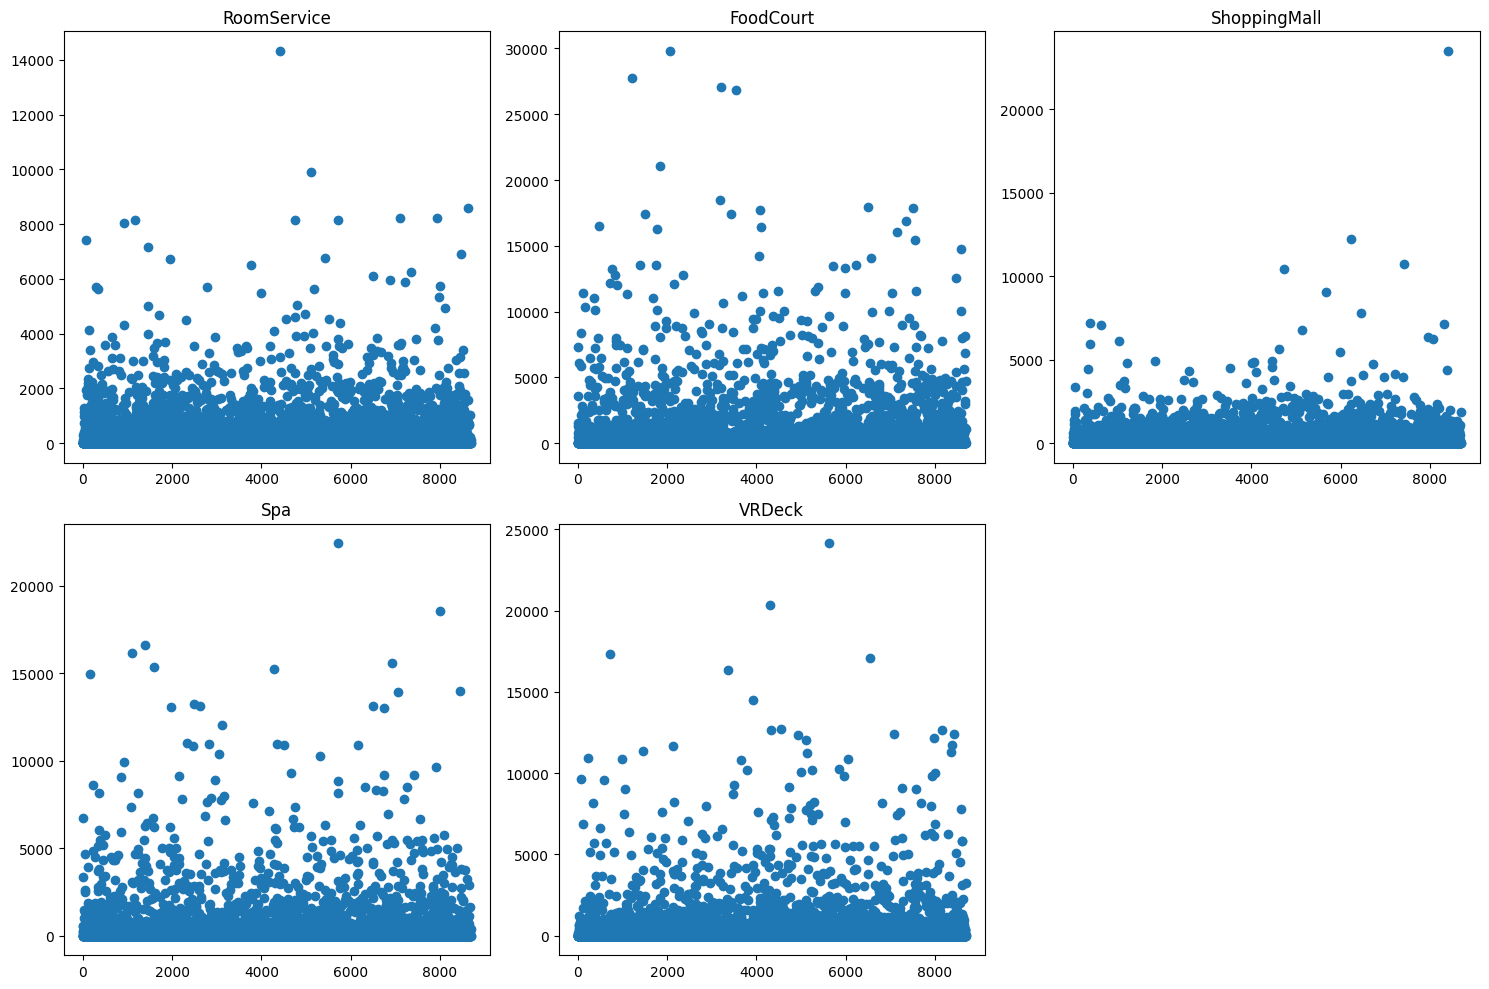

In [75]:


num_columns = 3

data = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
titles = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

num_rows = (len(data) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(data):
    axes[i].scatter(range(len(df_train[column])), df_train[column])
    axes[i].set_title(titles[i])

for i in range(len(data), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


melakukan data analisis dengan menghapus beberapa row, dan menambahkan kolom baru untuk proses train data yang akan digunakan

In [76]:

df_train = df_train[df_train['ShoppingMall'] <= 15000]
df_train = df_train[df_train['RoomService'] <= 12000]


df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)
df_train = df_train.drop(['Cabin'],axis=1)


df_train['Num'] = df_train['Num'].astype(int)


df_train['TotalAmount'] =df_train['ShoppingMall']+df_train['FoodCourt']+df_train['RoomService']+df_train['VRDeck']+df_train["Spa"]



In [77]:
df_train.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Num               int64
Side             object
TotalAmount     float64
dtype: object

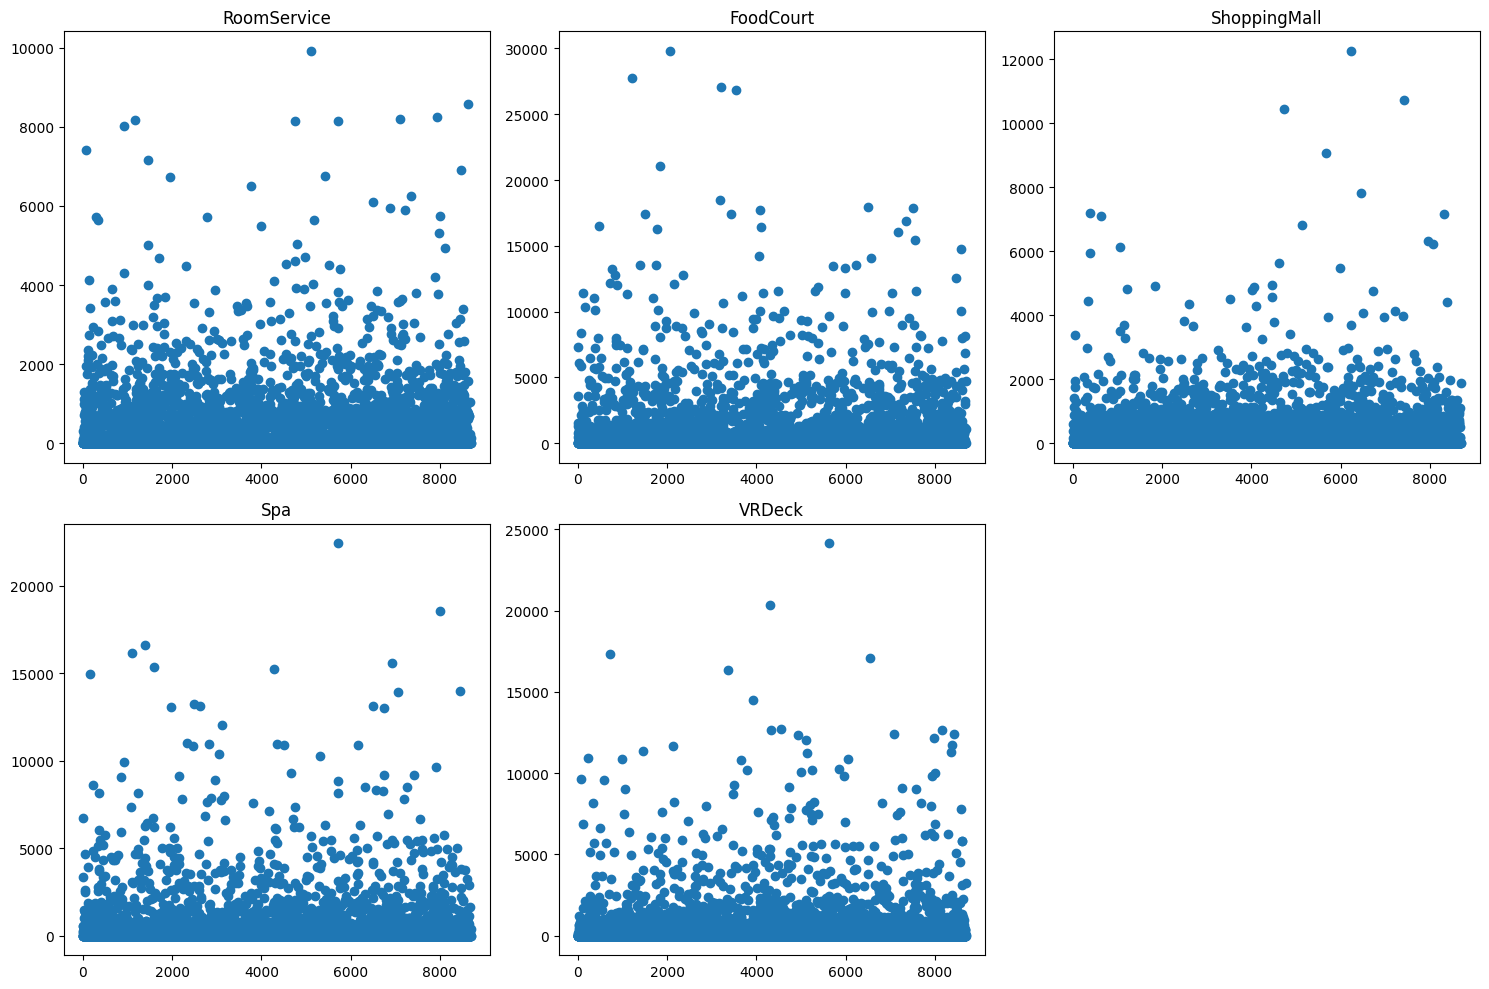

In [78]:


num_columns = 3

data = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
titles = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

num_rows = (len(data) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(data):
    axes[i].scatter(range(len(df_train[column])), df_train[column])
    axes[i].set_title(titles[i])

for i in range(len(data), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


melakukan proses normalisasi dengan menganti data ke numeric

In [79]:
df_train = pd.get_dummies(df_train,
                          columns=['HomePlanet',
                                   'CryoSleep',
                                   'Destination',
                                   'VIP','Deck','Side'],
                          dtype=float)

In [80]:
df_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,TotalAmount,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,736.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,10383.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,5176.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1091.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Melakukan proses yang sama pada data testing

In [81]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Name'],axis=1)
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


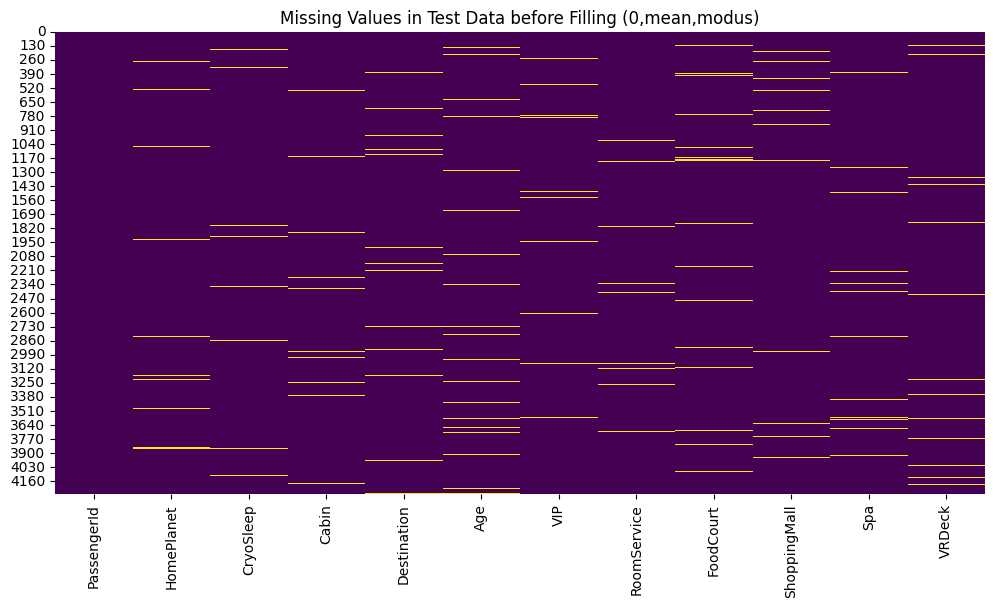

In [82]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Data before Filling (0,mean,modus)')
plt.show()

In [83]:
df_test['Spa'] = df_test['Spa'].fillna(0)

df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(0)

df_test['FoodCourt'] = df_test['FoodCourt'].fillna(0)

df_test['RoomService'] = df_test['RoomService'].fillna(0)

df_test['VRDeck'] = df_test['VRDeck'].fillna(0)
df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].mode()[0])
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mode()[0])
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].mode()[0])
df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].mode()[0])
df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].mode()[0])
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0])
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])



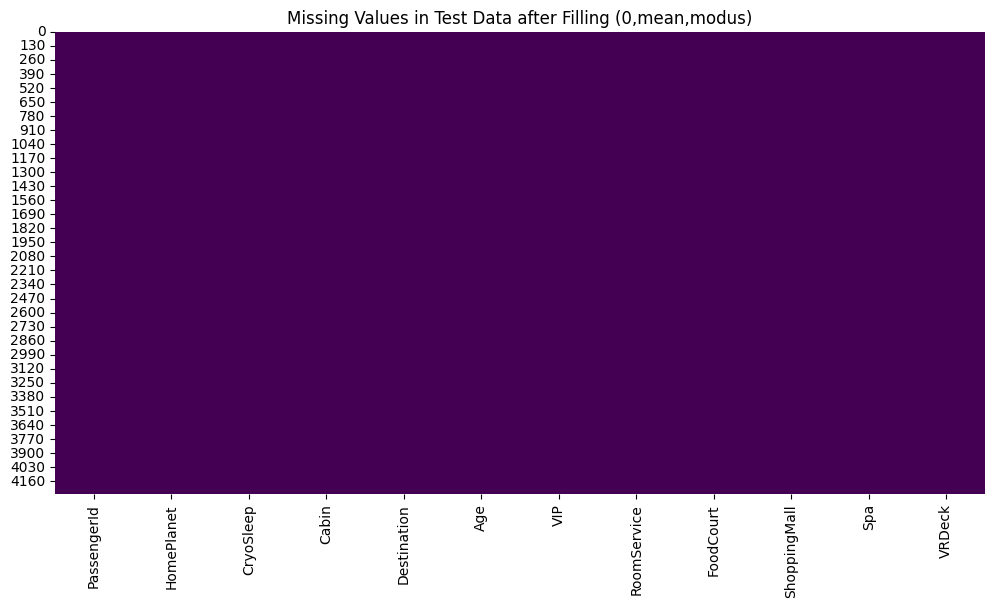

In [84]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Data after Filling (0,mean,modus)')
plt.show()

In [85]:
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test = df_test.drop(['Cabin'],axis=1)

df_test['TotalAmount'] = df_test['ShoppingMall'] + df_test['FoodCourt'] + df_test['RoomService'] + df_test['VRDeck'] + df_test['Spa']

df_test['Num'] = df_test['Num'].astype(int)

df_test = pd.get_dummies(df_test,
                          columns=['HomePlanet',
                                   'CryoSleep',
                                   'Destination',
                                   'VIP','Deck','Side'],
                          dtype=float)

In [86]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Num                          0
TotalAmount                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64
PassengerId                  0
Age                          0
RoomService               

In [87]:
X = df_train.drop(columns=["Transported"])
y = df_train["Transported"]
X.shape[0]

y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8691, dtype: bool

Pembuatan model dengan memanfaatkan data train 80% dan 20% testing

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
svm_model=SVC(kernel='rbf',gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model SVM :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model SVM : 0.7849338700402531
              precision    recall  f1-score   support

       False       0.86      0.69      0.76       878
        True       0.73      0.89      0.80       861

    accuracy                           0.78      1739
   macro avg       0.80      0.79      0.78      1739
weighted avg       0.80      0.78      0.78      1739



In [91]:
rdm_model = RandomForestClassifier(n_estimators=100)
rdm_model.fit(X_train, y_train)
y_pred = rdm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model RDM :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model RDM : 0.7935595169637722
              precision    recall  f1-score   support

       False       0.79      0.81      0.80       878
        True       0.80      0.78      0.79       861

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [92]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Decision Tree:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model Decision Tree: 0.7567567567567568
              precision    recall  f1-score   support

       False       0.77      0.73      0.75       878
        True       0.74      0.78      0.76       861

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [93]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model KNN : 0.7561817136285222
              precision    recall  f1-score   support

       False       0.77      0.73      0.75       878
        True       0.74      0.78      0.76       861

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [94]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model Naive : 0.7377803335250144
              precision    recall  f1-score   support

       False       0.84      0.59      0.70       878
        True       0.68      0.89      0.77       861

    accuracy                           0.74      1739
   macro avg       0.76      0.74      0.73      1739
weighted avg       0.76      0.74      0.73      1739



In [95]:
!pip install catboost

In [96]:
from catboost import CatBoostClassifier

y_test = y_test.astype(int)
y_train = y_train.astype(int)

cat = CatBoostClassifier(verbose = 0, random_state = 22)
param_grid_cat = {'iterations': [300],
              'learning_rate': [0.1],
              'depth': [4]}

grid_search_cat = GridSearchCV(estimator=cat, param_grid=param_grid_cat, cv=5, scoring='accuracy',n_jobs=-1)

grid_search_cat.fit(X_train, y_train)

print("Best Parameters (Cat):", grid_search_cat.best_params_)

accuracy_cat_train = grid_search_cat.best_estimator_.score(X_train, y_train)
accuracy_cat_test = grid_search_cat.best_estimator_.score(X_test, y_test)

print("Accuracy on train set:", accuracy_cat_train)
print("Accuracy on test set:", accuracy_cat_test)

report = classification_report(y_test, y_pred)
print(report)

Best Parameters (Cat): {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Accuracy on train set: 0.8583141542002302
Accuracy on test set: 0.8079355951696378
              precision    recall  f1-score   support

           0       0.84      0.59      0.70       878
           1       0.68      0.89      0.77       861

    accuracy                           0.74      1739
   macro avg       0.76      0.74      0.73      1739
weighted avg       0.76      0.74      0.73      1739



SMOTE


In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 5750, 1: 5750}, random_state=22)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5750) in class 0 will be larger than the number of samples in the majority class (class #True -> 4377)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5750) in class 1 will be larger than the number of samples in the majority class (class #True -> 4377)
  warnings.warn(


(11500, 28)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=22)

In [99]:
svm_model=SVC(kernel='rbf',gamma='scale', C=1.0)
svm_model.fit(X_resampled, y_resampled)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model SVM :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model SVM : 0.7924094307073031
              precision    recall  f1-score   support

       False       0.85      0.71      0.78       877
        True       0.75      0.87      0.81       862

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



In [100]:
rdm_model = RandomForestClassifier(n_estimators=100)
rdm_model.fit(X_resampled, y_resampled)
y_pred = rdm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model RDM :", accuracy)

# OVERFITTING  BAD
report = classification_report(y_test, y_pred)
print(report)

Akurasi model RDM : 0.9988499137435307
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       877
        True       1.00      1.00      1.00       862

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739



In [101]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Decision Tree:", accuracy)

# OVERFITTING  BAD

report = classification_report(y_test, y_pred)
print(report)

Akurasi model Decision Tree: 0.9976998274870615
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       877
        True       1.00      1.00      1.00       862

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739



In [102]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled, y_resampled)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi model KNN : 0.8441633122484187
              precision    recall  f1-score   support

       False       0.86      0.82      0.84       877
        True       0.83      0.87      0.85       862

    accuracy                           0.84      1739
   macro avg       0.84      0.84      0.84      1739
weighted avg       0.85      0.84      0.84      1739



In [103]:
naive_model = GaussianNB()
naive_model.fit(X_resampled, y_resampled)
y_pred = naive_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive  :", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Akurasi Naive  : 0.7567567567567568
              precision    recall  f1-score   support

       False       0.84      0.64      0.73       877
        True       0.71      0.87      0.78       862

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.75      1739
weighted avg       0.77      0.76      0.75      1739



In [104]:
grid_search_cat = GridSearchCV(estimator=cat, param_grid=param_grid_cat, cv=5, scoring='accuracy',n_jobs=-1)

grid_search_cat.fit(X_resampled, y_resampled)

print("Best Parameters (Cat):", grid_search_cat.best_params_)

accuracy_cat_train = grid_search_cat.best_estimator_.score(X_resampled, y_resampled)
accuracy_cat_test = grid_search_cat.best_estimator_.score(X_test, y_test)

print("Accuracy on train set:", accuracy_cat_train)
print("Accuracy on test set:", accuracy_cat_test)

report = classification_report(y_test, y_pred)
print(report)

Best Parameters (Cat): {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Accuracy on train set: 0.8648695652173913
Accuracy on test set: 0.8493387004025302
              precision    recall  f1-score   support

       False       0.84      0.64      0.73       877
        True       0.71      0.87      0.78       862

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.75      1739
weighted avg       0.77      0.76      0.75      1739



In [105]:
prediction = grid_search_cat.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.8493387004025302


In [106]:
df_test.dtypes

PassengerId                   object
Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Num                            int64
TotalAmount                  float64
HomePlanet_Earth             float64
HomePlanet_Europa            float64
HomePlanet_Mars              float64
CryoSleep_False              float64
CryoSleep_True               float64
Destination_55 Cancri e      float64
Destination_PSO J318.5-22    float64
Destination_TRAPPIST-1e      float64
VIP_False                    float64
VIP_True                     float64
Deck_A                       float64
Deck_B                       float64
Deck_C                       float64
Deck_D                       float64
Deck_E                       float64
Deck_F                       float64
Deck_G                       float64
Deck_T                       float64
S

In [107]:
test_passenger_id = df_test['PassengerId']
df_test = df_test.drop(columns=['PassengerId'])

In [108]:
prediction = grid_search_cat.predict(df_test)
prediction

array([ True, False,  True, ...,  True,  True,  True])

In [109]:
data_valid = pd.DataFrame({
    'PassengerId' : test_passenger_id,
    'Transported' : prediction

})
data_valid.to_csv('result.csv', index=False)
from google.colab import files
files.download("result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.84      0.64      0.73       877
        True       0.71      0.87      0.78       862

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.75      1739
weighted avg       0.77      0.76      0.75      1739

